<a href="https://colab.research.google.com/github/Naive1104/Basics/blob/main/firstML_pyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install numpy


In [ ]:
pip install matplotlib


In [ ]:
pip install scikit-learn



Predicted Race Winners:
Verstappen: 15.05% chance of winning
Hamilton: 12.76% chance of winning
Leclerc: 10.98% chance of winning
Russell: 10.57% chance of winning
Norris: 10.24% chance of winning
Piastri: 8.41% chance of winning
Sainz: 8.31% chance of winning
Alonso: 8.09% chance of winning
Perez: 7.84% chance of winning
Gasly: 7.75% chance of winning


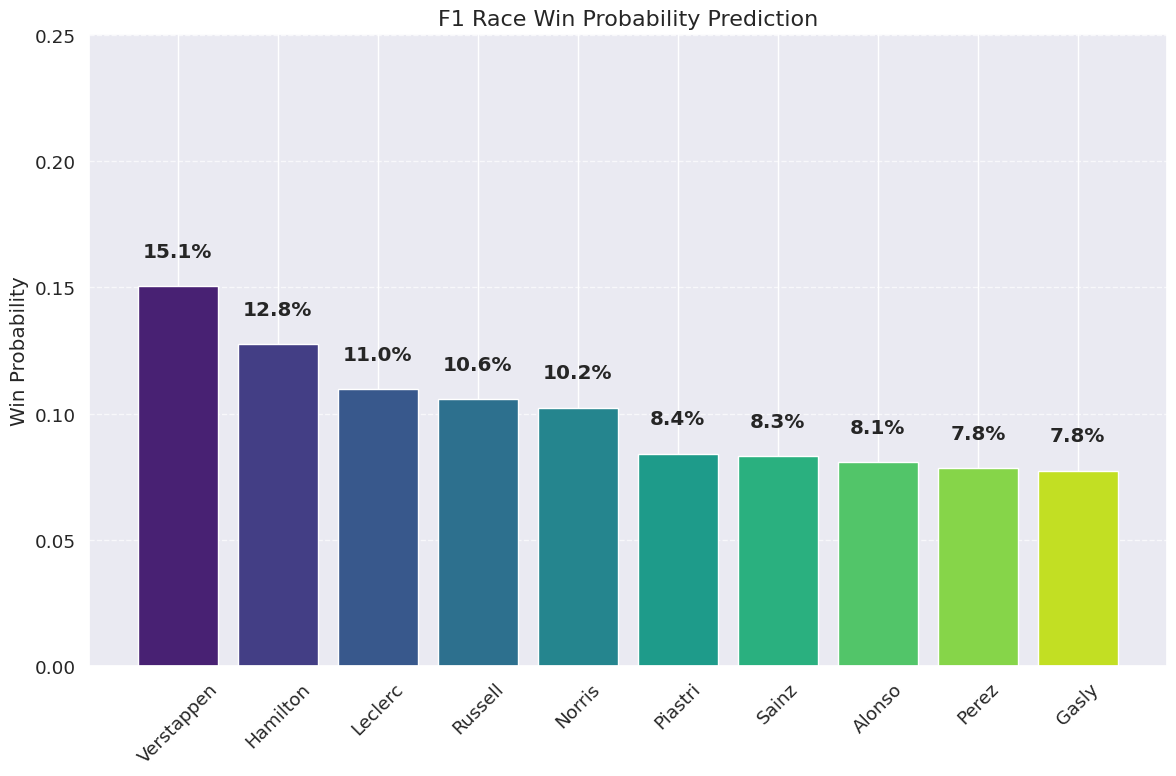

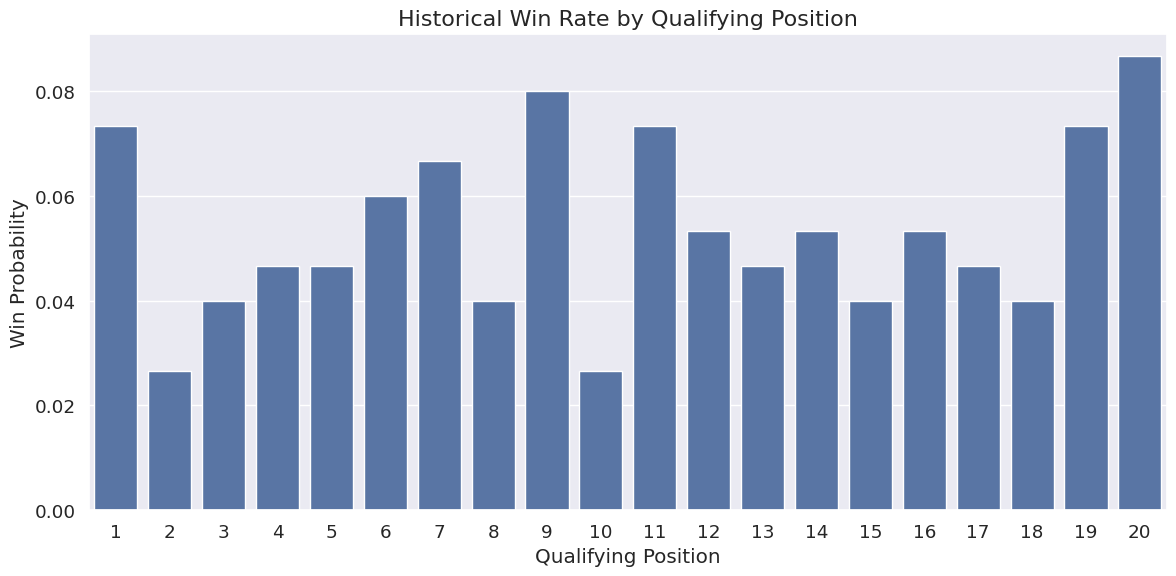

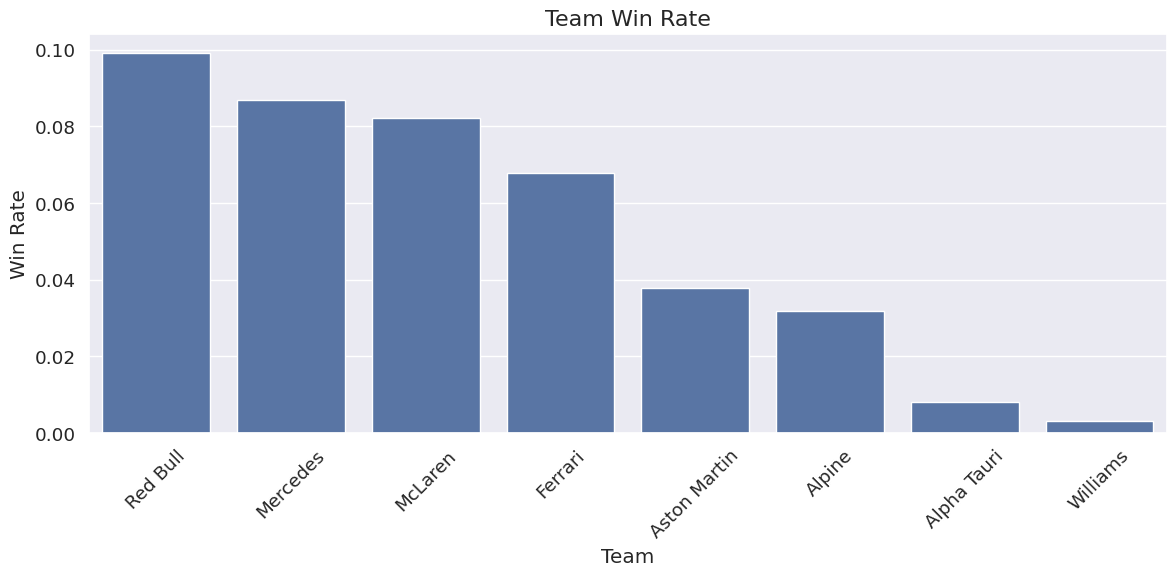

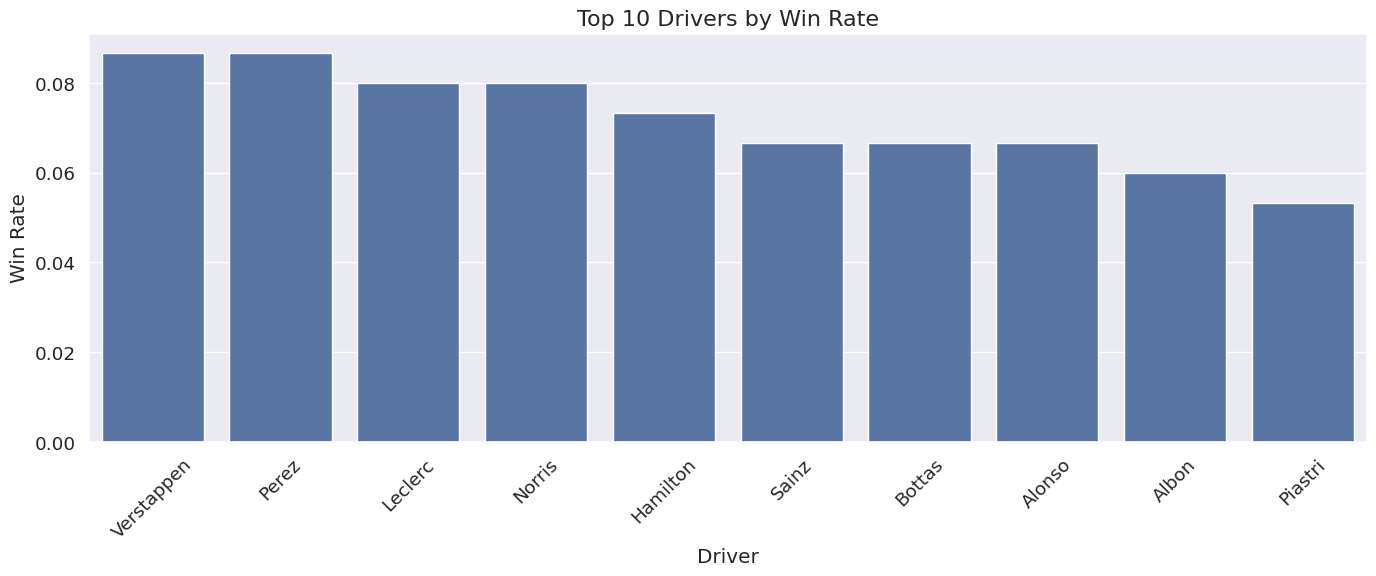

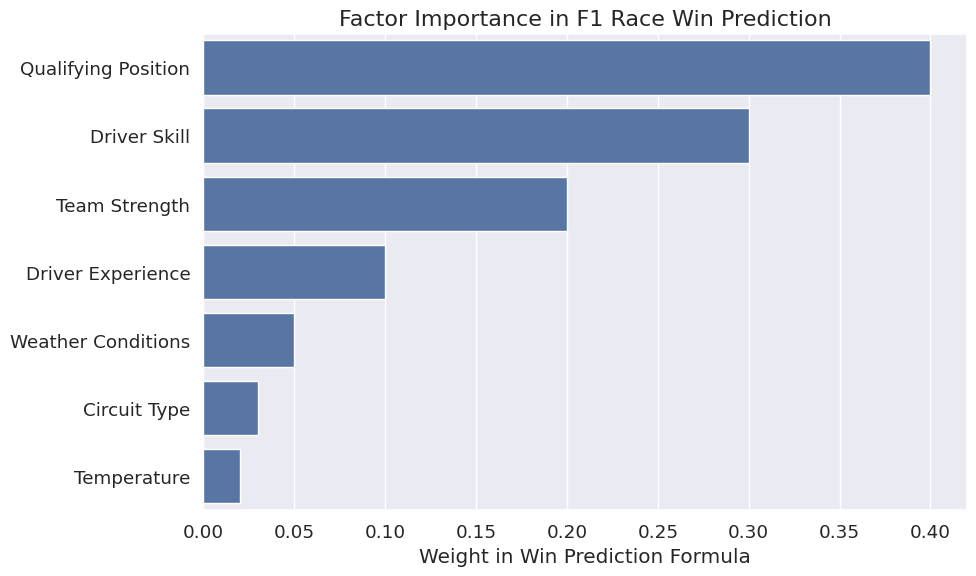

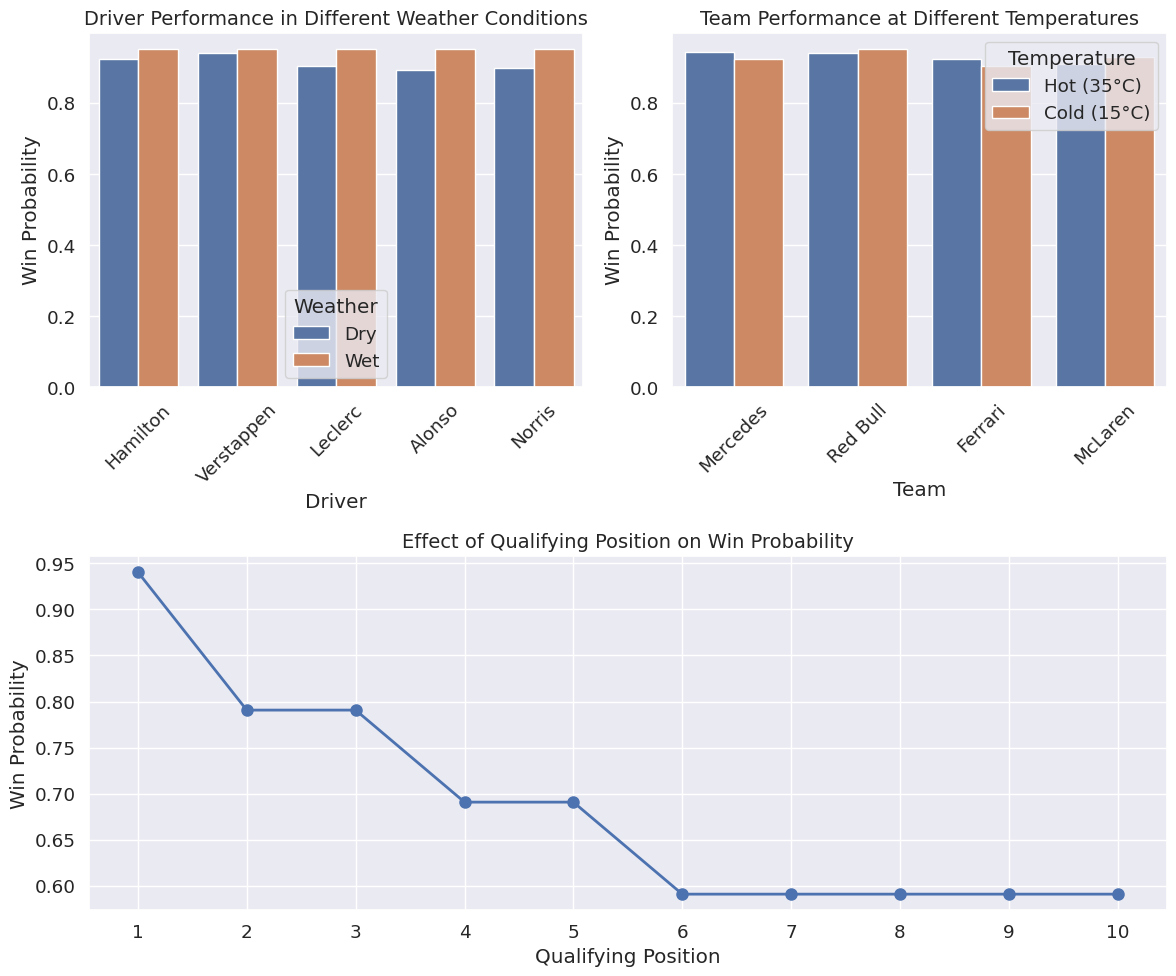

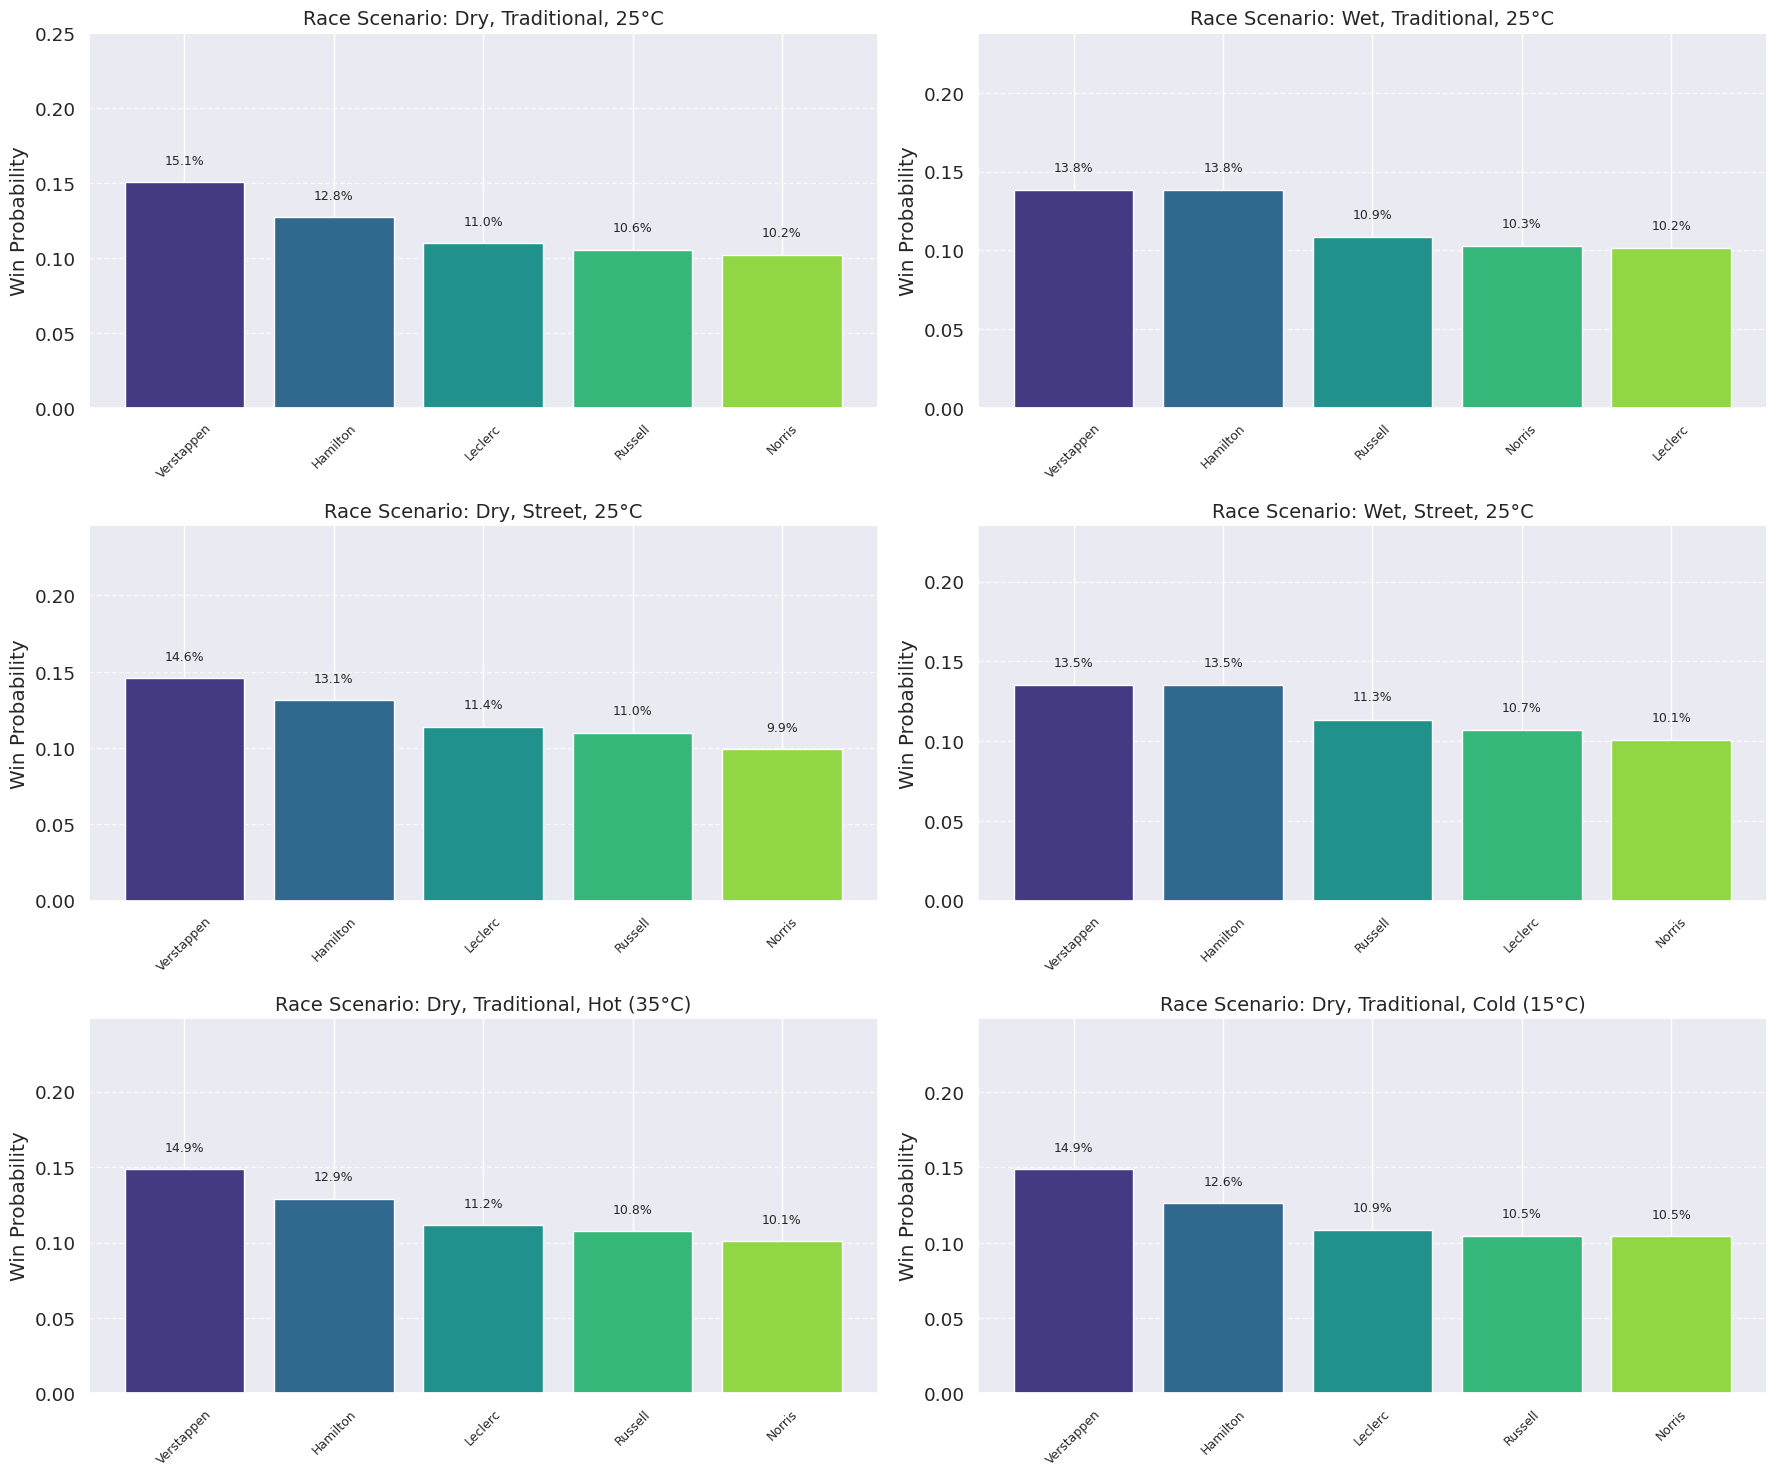

All visualizations have been created and saved as PNG files.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set better visual style
plt.style.use('ggplot')
sns.set(font_scale=1.2)

# Create sample F1 data
def create_sample_f1_data(n_races=100):
    np.random.seed(42)  # For reproducibility

    # Teams with varying performance levels
    teams = ['Mercedes', 'Red Bull', 'Ferrari', 'McLaren', 'Alpine', 'Aston Martin', 'Alpha Tauri', 'Williams']

    # Drivers with varying experience levels
    drivers = [
        'Hamilton', 'Verstappen', 'Leclerc', 'Norris', 'Alonso', 'Piastri',
        'Sainz', 'Perez', 'Russell', 'Stroll', 'Gasly', 'Ocon', 'Tsunoda',
        'Albon', 'Bottas', 'Zhou', 'Magnussen', 'Hulkenberg', 'Sargeant', 'Ricciardo'
    ]

    # Team strength (higher is better)
    team_strength = {
        'Mercedes': 85, 'Red Bull': 90, 'Ferrari': 80, 'McLaren': 83,
        'Alpine': 70, 'Aston Martin': 75, 'Alpha Tauri': 65, 'Williams': 60
    }

    # Driver skill (higher is better)
    driver_skill = {
        'Hamilton': 95, 'Verstappen': 98, 'Leclerc': 92, 'Norris': 90,
        'Alonso': 88, 'Piastri': 85, 'Sainz': 87, 'Perez': 86,
        'Russell': 89, 'Stroll': 78, 'Gasly': 82, 'Ocon': 80,
        'Tsunoda': 79, 'Albon': 81, 'Bottas': 83, 'Zhou': 76,
        'Magnussen': 77, 'Hulkenberg': 79, 'Sargeant': 74, 'Ricciardo': 84
    }

    # Create empty dataframe
    data = []

    # Generate race data
    for i in range(n_races):
        # Randomly select drivers for this race
        race_drivers = np.random.choice(drivers, 20, replace=False)
        race_teams = [np.random.choice(teams) for _ in range(20)]

        # Generate qualifying positions
        qualifying_positions = np.arange(1, 21)
        np.random.shuffle(qualifying_positions)

        # Sort qualifying based on team and driver skill (with some randomness)
        driver_team_skill = [team_strength[team]*0.6 + driver_skill[driver]*0.4 + np.random.normal(0, 10)
                            for driver, team in zip(race_drivers, race_teams)]

        # Sort drivers by skill for qualifying
        sorted_indices = np.argsort(-np.array(driver_team_skill))
        race_drivers = [race_drivers[i] for i in sorted_indices]
        race_teams = [race_teams[i] for i in sorted_indices]
        qualifying_positions = [qualifying_positions[i] for i in sorted_indices]

        # Weather conditions (0 = dry, 1 = wet)
        weather = np.random.choice([0, 1], p=[0.8, 0.2])

        # Circuit type (0 = street, 1 = traditional)
        circuit_type = np.random.choice([0, 1], p=[0.3, 0.7])

        # Experience in years (simulated)
        experience = {driver: np.random.randint(1, 16) for driver in drivers}

        # Race weekend temperatures
        temperature = np.random.randint(15, 40)

        # Add driver experience and other factors
        for j, (driver, team, quali_pos) in enumerate(zip(race_drivers, race_teams, qualifying_positions)):
            # Calculate win probability based on various factors
            win_prob = (
                (1.0 / quali_pos) * 0.4 +  # Qualifying position (huge impact)
                (driver_skill[driver] / 100) * 0.3 +  # Driver skill
                (team_strength[team] / 100) * 0.2 +  # Team strength
                (experience[driver] / 15) * 0.1  # Experience
            )

            # Adjust for weather and circuit type
            if weather == 1:  # Wet conditions favor experienced drivers
                win_prob += (experience[driver] / 15) * 0.1

            if circuit_type == 0:  # Street circuits favor precise drivers
                win_prob += (driver_skill[driver] / 100) * 0.05

            # Winner is determined partly by probability, partly by randomness
            winner = 1 if j == 0 else 0  # Simplification: pole position has high chance to win

            # But sometimes there are upsets! (less likely)
            if np.random.random() < 0.3:  # 30% chance of upset
                if j < 5:  # Only top 5 qualifiers have realistic upset chance
                    winner = np.random.choice([0, 1], p=[0.7, 0.3])

            data.append({
                'driver': driver,
                'team': team,
                'qualifying_position': quali_pos,
                'driver_experience': experience[driver],
                'team_strength': team_strength[team],
                'driver_skill': driver_skill[driver],
                'weather': weather,
                'circuit_type': circuit_type,
                'temperature': temperature,
                'winner': winner
            })

    return pd.DataFrame(data), driver_skill, team_strength

# Generate sample data
df, driver_skill_dict, team_strength_dict = create_sample_f1_data(150)

# Define a direct calculation function to predict winners (no machine learning)
def calculate_win_probability(driver, team, quali_position, experience, weather, circuit_type, temperature):
    """
    Calculate win probability directly based on known factors
    """
    # Base win probability from qualifying position (drops exponentially)
    if quali_position == 1:
        quali_factor = 0.40  # Pole position has huge advantage
    elif quali_position <= 3:
        quali_factor = 0.25  # Front row has good advantage
    elif quali_position <= 5:
        quali_factor = 0.15  # Top 5 has decent chance
    elif quali_position <= 10:
        quali_factor = 0.05  # Points positions have small chance
    else:
        quali_factor = 0.01  # Back of grid has tiny chance

    # Driver skill factor (normalized to 0-0.3 range)
    driver_factor = driver_skill_dict.get(driver, 80) / 100 * 0.3

    # Team strength factor (normalized to 0-0.2 range)
    team_factor = team_strength_dict.get(team, 70) / 100 * 0.2

    # Experience factor (normalized to 0-0.1 range)
    exp_factor = min(experience, 15) / 15 * 0.1

    # Weather adjustment
    weather_factor = 0
    if weather == 1:  # Wet conditions
        # Experienced drivers do better in wet conditions
        weather_factor = min(experience, 15) / 15 * 0.1

        # Some drivers are known to be good in wet conditions
        wet_specialists = ['Hamilton', 'Verstappen', 'Alonso']
        if driver in wet_specialists:
            weather_factor += 0.05

    # Circuit type adjustment
    circuit_factor = 0
    if circuit_type == 0:  # Street circuit
        # Precise drivers do better on street circuits
        precise_drivers = ['Hamilton', 'Leclerc', 'Alonso', 'Russell']
        if driver in precise_drivers:
            circuit_factor += 0.05

    # Temperature factor (minimal effect)
    temp_factor = 0
    if temperature > 30:  # Hot conditions
        # Some teams/drivers better in hot conditions
        hot_performers = ['Ferrari', 'Mercedes']
        if team in hot_performers:
            temp_factor += 0.02
    elif temperature < 20:  # Cold conditions
        # Some teams/drivers better in cold conditions
        cold_performers = ['Red Bull', 'McLaren']
        if team in cold_performers:
            temp_factor += 0.02

    # Calculate total probability
    total_prob = quali_factor + driver_factor + team_factor + exp_factor + weather_factor + circuit_factor + temp_factor

    # Cap at reasonable values and ensure positive
    return min(max(total_prob, 0.01), 0.95)

# Function to predict race winners
def predict_race_winner(qualifying_results, weather_forecast, circuit_type, temperature):
    """
    Predict the winner of a race based on qualifying results and conditions

    Parameters:
    qualifying_results: List of tuples (driver, team, position)
    weather_forecast: 0 for dry, 1 for wet
    circuit_type: 0 for street, 1 for traditional
    temperature: Race temperature in Celsius

    Returns:
    List of tuples with (driver, win_probability)
    """
    predictions = []

    for driver, team, position in qualifying_results:
        # Get driver experience (or use default if not in our data)
        driver_exp = df[df['driver'] == driver]['driver_experience'].values[0] if driver in df['driver'].values else 5

        # Calculate win probability using our direct calculation function
        win_prob = calculate_win_probability(
            driver=driver,
            team=team,
            quali_position=position,
            experience=driver_exp,
            weather=weather_forecast,
            circuit_type=circuit_type,
            temperature=temperature
        )

        predictions.append((driver, win_prob))

    # Normalize probabilities to ensure they sum close to 1
    total_prob = sum(p[1] for p in predictions)
    normalized_predictions = [(driver, prob/total_prob) for driver, prob in predictions]

    return normalized_predictions

# Example qualifying results
sample_qualifying = [
    ('Verstappen', 'Red Bull', 1),
    ('Leclerc', 'Ferrari', 2),
    ('Hamilton', 'Mercedes', 3),
    ('Norris', 'McLaren', 4),
    ('Russell', 'Mercedes', 5),
    ('Sainz', 'Ferrari', 6),
    ('Perez', 'Red Bull', 7),
    ('Alonso', 'Aston Martin', 8),
    ('Piastri', 'McLaren', 9),
    ('Gasly', 'Alpine', 10)
]

# Predict with current conditions (dry weather, traditional circuit, 25°C)
predictions = predict_race_winner(sample_qualifying, weather_forecast=0, circuit_type=1, temperature=25)

print("\nPredicted Race Winners:")
for driver, prob in sorted(predictions, key=lambda x: x[1], reverse=True):
    print(f"{driver}: {prob:.2%} chance of winning")

# ===== VISUALIZATIONS =====

# Visualization 1: Race Prediction Visualization
sorted_predictions = sorted(predictions, key=lambda x: x[1], reverse=True)
drivers = [p[0] for p in sorted_predictions]
probabilities = [p[1] for p in sorted_predictions]

plt.figure(figsize=(12, 8))
bars = plt.bar(drivers, probabilities, color=sns.color_palette("viridis", len(drivers)))

# Add percentage labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f"{height:.1%}", ha='center', va='bottom', fontweight='bold')

plt.title('F1 Race Win Probability Prediction', fontsize=16)
plt.ylabel('Win Probability')
plt.ylim(0, max(probabilities) + 0.1)  # Add some space for the percentage labels
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('race_prediction.png')
plt.show()

# Visualization 2: Win Rate by Qualifying Position (from historical data)
win_rate_by_position = df.groupby('qualifying_position')['winner'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='qualifying_position', y='winner', data=win_rate_by_position)
plt.title('Historical Win Rate by Qualifying Position', fontsize=16)
plt.xlabel('Qualifying Position')
plt.ylabel('Win Probability')
plt.tight_layout()
plt.savefig('win_rate_by_position.png')
plt.show()

# Visualization 3: Team Performance Comparison
team_performance = df.groupby('team')['winner'].mean().sort_values(ascending=False).reset_index()
team_performance.columns = ['Team', 'Win Rate']

plt.figure(figsize=(12, 6))
sns.barplot(x='Team', y='Win Rate', data=team_performance)
plt.title('Team Win Rate', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('team_win_rate.png')
plt.show()

# Visualization 4: Driver Performance
driver_performance = df.groupby('driver')['winner'].mean().sort_values(ascending=False).reset_index()
driver_performance.columns = ['Driver', 'Win Rate']

plt.figure(figsize=(14, 6))
sns.barplot(x='Driver', y='Win Rate', data=driver_performance.head(10))
plt.title('Top 10 Drivers by Win Rate', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('driver_win_rate.png')
plt.show()

# Visualization 5: Factor Importance Visualization
# Based on our formula weights rather than ML
factor_weights = {
    'Qualifying Position': 0.40,
    'Driver Skill': 0.30,
    'Team Strength': 0.20,
    'Driver Experience': 0.10,
    'Weather Conditions': 0.05,
    'Circuit Type': 0.03,
    'Temperature': 0.02
}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(factor_weights.values()), y=list(factor_weights.keys()))
plt.title('Factor Importance in F1 Race Win Prediction', fontsize=16)
plt.xlabel('Weight in Win Prediction Formula')
plt.tight_layout()
plt.savefig('factor_importance.png')
plt.show()

# Visualization 6: Weather Impact Visualization
plt.figure(figsize=(12, 10))

# Create data for visualization: how different drivers perform in wet vs dry
drivers_to_show = ['Hamilton', 'Verstappen', 'Leclerc', 'Alonso', 'Norris']
weather_performance = []

for driver in drivers_to_show:
    # Calculate performance in different conditions
    dry_performance = calculate_win_probability(
        driver=driver, team='Mercedes' if driver == 'Hamilton' else 'Red Bull' if driver == 'Verstappen' else 'Ferrari',
        quali_position=1, experience=10, weather=0, circuit_type=1, temperature=25
    )

    wet_performance = calculate_win_probability(
        driver=driver, team='Mercedes' if driver == 'Hamilton' else 'Red Bull' if driver == 'Verstappen' else 'Ferrari',
        quali_position=1, experience=10, weather=1, circuit_type=1, temperature=25
    )

    weather_performance.append({
        'Driver': driver,
        'Condition': 'Dry',
        'Performance': dry_performance
    })

    weather_performance.append({
        'Driver': driver,
        'Condition': 'Wet',
        'Performance': wet_performance
    })

weather_df = pd.DataFrame(weather_performance)

plt.subplot(221)
sns.barplot(x='Driver', y='Performance', hue='Condition', data=weather_df)
plt.title('Driver Performance in Different Weather Conditions', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Win Probability')
plt.legend(title='Weather')

# Team performance in different temperatures
plt.subplot(222)
teams_to_show = ['Mercedes', 'Red Bull', 'Ferrari', 'McLaren']
temp_performance = []

for team in teams_to_show:
    # Calculate performance in different temperatures
    hot_performance = calculate_win_probability(
        driver='Hamilton' if team == 'Mercedes' else 'Verstappen' if team == 'Red Bull' else 'Leclerc',
        team=team, quali_position=1, experience=10, weather=0, circuit_type=1, temperature=35
    )

    cold_performance = calculate_win_probability(
        driver='Hamilton' if team == 'Mercedes' else 'Verstappen' if team == 'Red Bull' else 'Leclerc',
        team=team, quali_position=1, experience=10, weather=0, circuit_type=1, temperature=15
    )

    temp_performance.append({
        'Team': team,
        'Temperature': 'Hot (35°C)',
        'Performance': hot_performance
    })

    temp_performance.append({
        'Team': team,
        'Temperature': 'Cold (15°C)',
        'Performance': cold_performance
    })

temp_df = pd.DataFrame(temp_performance)

sns.barplot(x='Team', y='Performance', hue='Temperature', data=temp_df)
plt.title('Team Performance at Different Temperatures', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Win Probability')
plt.legend(title='Temperature')

# Visualization of how qualifying position affects win chance
plt.subplot(212)
quali_positions = list(range(1, 11))
quali_performances = []

for pos in quali_positions:
    performance = calculate_win_probability(
        driver='Verstappen', team='Red Bull',
        quali_position=pos, experience=10, weather=0, circuit_type=1, temperature=25
    )

    quali_performances.append(performance)

plt.plot(quali_positions, quali_performances, marker='o', linewidth=2, markersize=8)
plt.title('Effect of Qualifying Position on Win Probability', fontsize=14)
plt.xlabel('Qualifying Position')
plt.ylabel('Win Probability')
plt.grid(True)
plt.xticks(quali_positions)

plt.tight_layout()
plt.savefig('performance_factors.png')
plt.show()

# Create an interactive dashboard function to make predictions easily
def interactive_prediction(qualifying_results):
    """
    Creates visualizations for different race scenarios
    """
    conditions = [
        (0, 1, 25, 'Dry, Traditional, 25°C'),
        (1, 1, 25, 'Wet, Traditional, 25°C'),
        (0, 0, 25, 'Dry, Street, 25°C'),
        (1, 0, 25, 'Wet, Street, 25°C'),
        (0, 1, 35, 'Dry, Traditional, Hot (35°C)'),
        (0, 1, 15, 'Dry, Traditional, Cold (15°C)')
    ]

    plt.figure(figsize=(18, 15))

    for i, (weather, circuit, temp, title) in enumerate(conditions, 1):
        plt.subplot(3, 2, i)

        predictions = predict_race_winner(qualifying_results, weather_forecast=weather,
                                          circuit_type=circuit, temperature=temp)

        sorted_predictions = sorted(predictions, key=lambda x: x[1], reverse=True)
        top_drivers = [p[0] for p in sorted_predictions[:5]]  # Show top 5 for clarity
        top_probabilities = [p[1] for p in sorted_predictions[:5]]

        bars = plt.bar(top_drivers, top_probabilities, color=sns.color_palette("viridis", len(top_drivers)))

        # Add percentage labels on top of each bar
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                     f"{height:.1%}", ha='center', va='bottom', fontsize=9)

        plt.title(f'Race Scenario: {title}', fontsize=14)
        plt.ylabel('Win Probability')
        plt.ylim(0, max(top_probabilities) + 0.1)
        plt.xticks(rotation=45, fontsize=9)
        plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.savefig('scenario_comparison.png')
    plt.show()

# Run the interactive prediction with our sample qualifying results
interactive_prediction(sample_qualifying)

print("All visualizations have been created and saved as PNG files.")

In [ ]:
pip install pandas


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 1. Load the CSV file
data = pd.read_csv('dollar_prices.csv')  # Make sure this file is in the same folder

# 2. Extract input (X) and output (y)
X = data[['Day']].values   # 2D array (input features)
y = data['Dollar'].values  # 1D array (target values)

# 3. Create and train the model
model = LinearRegression()
model.fit(X, y)

# 4. Predict for a new day
day = 12
predicted_price = model.predict([[day]])
print(f"Predicted dollar price on day {day}: ${predicted_price[0]:.2f}")

# 5. Plotting
plt.scatter(X, y, color='blue', label='Training Data')
plt.plot(X, model.predict(X), color='green', label='Model')
plt.scatter([[day]], predicted_price, color='red', label='Prediction')
plt.xlabel("Day")
plt.ylabel("Dollar Price")
plt.legend()
plt.title("Dollar Price Prediction from CSV")
plt.grid(True)
plt.show()
